# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [10]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

In [ ]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

In [ ]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


<b><h3>Ejercicio 1: 

<b><h3>Parte A)

<b><h3>Explique como funciona el método som.

Se crean mapas auto-organizados para mapear espectros o patrones de alta dimensión a 2D. Se utiliza la distancia euclidiana.

<b><h3>Describa parámetros de entrada y salida.

som(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01), radius = quantile(nhbrdist, 0.67) * c(1, -1), init, toroidal = FALSE, n.hood, keep.data = TRUE)

Parámetros de entrada:
- data: Una matriz, con cada fila que representa un objeto.
- grid: Una grilla para los representantes.
- rlen: El número de veces que el conjunto completo de datos se presentará en la red.
- alpha: Tasa de aprendizaje, un vector de dos números que indica la cantidad de cambio.
- radius: El radio de la vecindad, dado como un solo número o un vector (inicio, parada).
- init: Los representantes iniciales, representados como una matriz.
- toroidal: Si es VERDADERO, los bordes del mapa están unidos.
- n.hood: La forma del barrio, ya sea "circular" o "cuadrada".
- keep.data: Guardar datos en objeto de retorno.

Valor de salida: Un objeto de la clase "kohonen" con los siguientes componentes:
- data: Matriz de datos, solo se devuelve si keep.data == TRUE.
- grid: La cuadrícula, un objeto de clase "somgrid".
- codes: Una matriz de vectores de código.
- changes: Vector de desviaciones promedio de los vectores de código.
- unit.classif: Unidades ganadoras para todos los objetos de datos, solo se devuelven si keep.data == VERDADERO.
- distances: Distancias de los objetos a su unidad ganadora correspondiente, solo se devuelven si keep.data == TRUE.
- toroidal: Si se utiliza un mapa toroidal.
- method: El tipo de som, aquí "som".

<b><h3>Describa los gráficos obtenidos.

Aquí se observan las 4 grupaciones formadas con 5 categorías. Se puede ver que hay diferencias notorias entre las diferentes agrupaciones lo que puede ser indicativo de que 4 es un número efectivo de agrupaciones para este conjunto de datos.

In [ ]:
plot(sommap)

Este gráfico muestra la cantidad de elementos que cada agrupación posee a través de diferentes colores.

In [ ]:
plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

Este gráfico muestra los elementos de cada agrupación representados como puntos.

In [ ]:
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

Este gráfico muestra la suma de las distancias a todos los vecinos inmediatos.

In [ ]:
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

<b><h3>Parte B) 

<b><h3>Modifique parámetros de entrada.

In [ ]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(5, 5, "rectangular"))
plot(sommap)

<b><h3>Interprete y comente los resultados obtenidos.

- Como se puede observar el parámetro de entrada "rectangular" ha modificado la forma en la que se vizualizan los grupos.
- Se observan 25 agrupaciones debido al nuevo tamaño de la malla.
- Se observan muchas agrupaciones similares lo que puede ser un indicio de que se han formado demaciadas agrupaciones y que se debería elejir un tamaño de malla menor.

In [ ]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
#add.cluster.boundaries(sommap, som.hc)


<b><h3>Ejercicio 2:

<b><h3>a) Explique como funciona esta nueva visualización.

Se están visualizando las agrupaciones realizadas por el mñetodo sum, pero adicionalmente se está realizando un agrupamiento de colores de estos grupos con el mñetodo hclust de agrupamiento jerárquico.

<b><h3>b) Interprete y comente los resultados obtenidos. 

Se está utilizando el método hclust de agrupamiento jerárquico para agrupar por colores los grupos formados por el método sum.

<b><h3>Ejercicio 3:

<b><h3>a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección.

In [11]:
datos <-read.table("diabetes.dat",dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

       X6              X148            X72             X35       
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.0   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.0   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.0   Median :23.00  
 Mean   : 3.842   Mean   :120.9   Mean   : 69.1   Mean   :20.52  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.0   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.0   Max.   :99.00  
       X0            X33.6           X0.627            X50       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2435   1st Qu.:24.00  
 Median : 32.0   Median :32.00   Median :0.3710   Median :29.00  
 Mean   : 79.9   Mean   :31.99   Mean   :0.4717   Mean   :33.22  
 3rd Qu.:127.5   3rd Qu.:36.60   3rd Qu.:0.6250   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
       X1        
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mea

Este conjunto de datos tiene 9 dimensiones. Debido a que este algoritmo es efectivo con problemas de altas dimensiones es apropiado elegir este conjunto de datos.

<b><h3>b) Realice las estimaciones y discuta sus resultados.

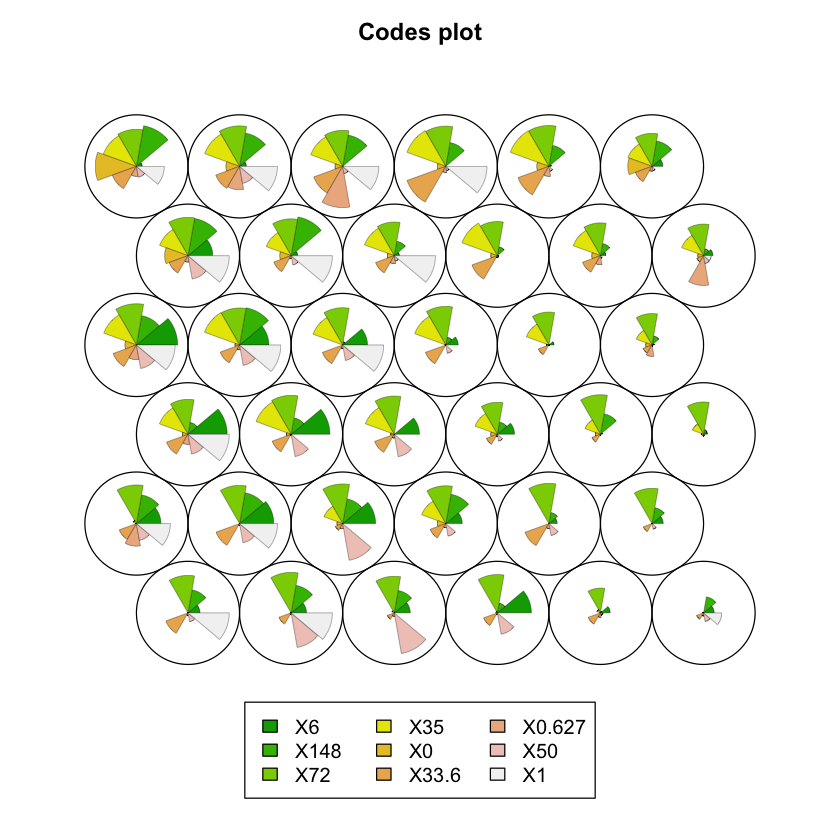

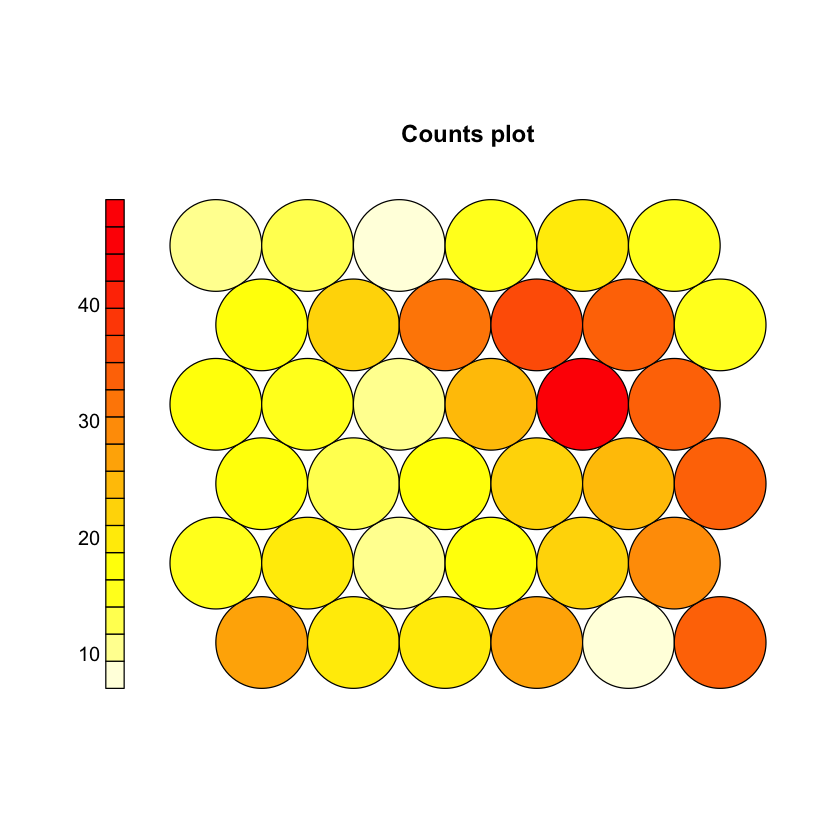

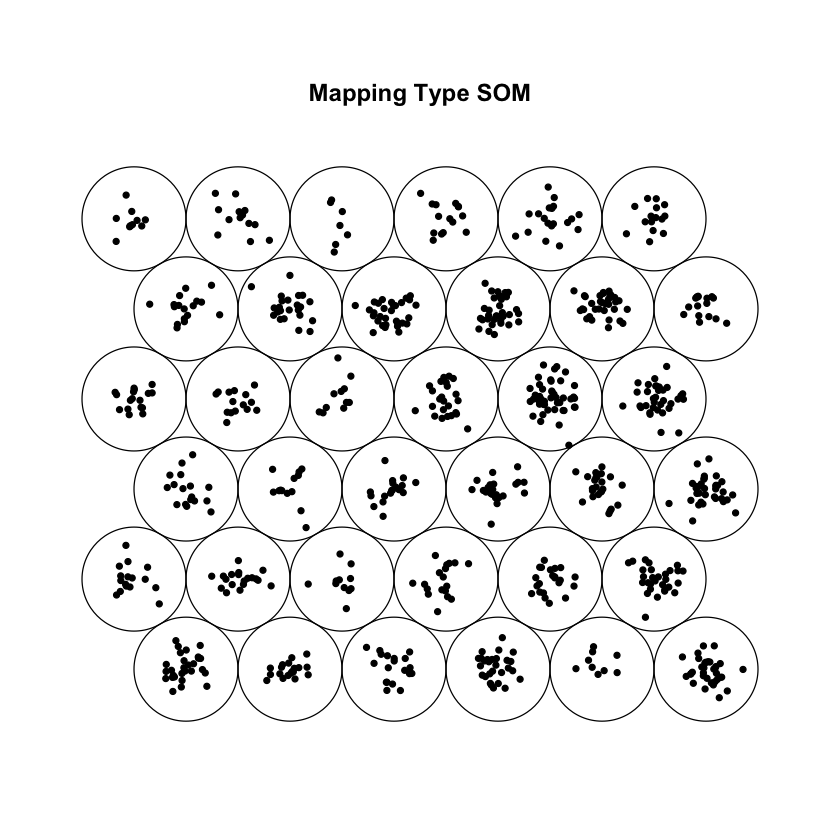

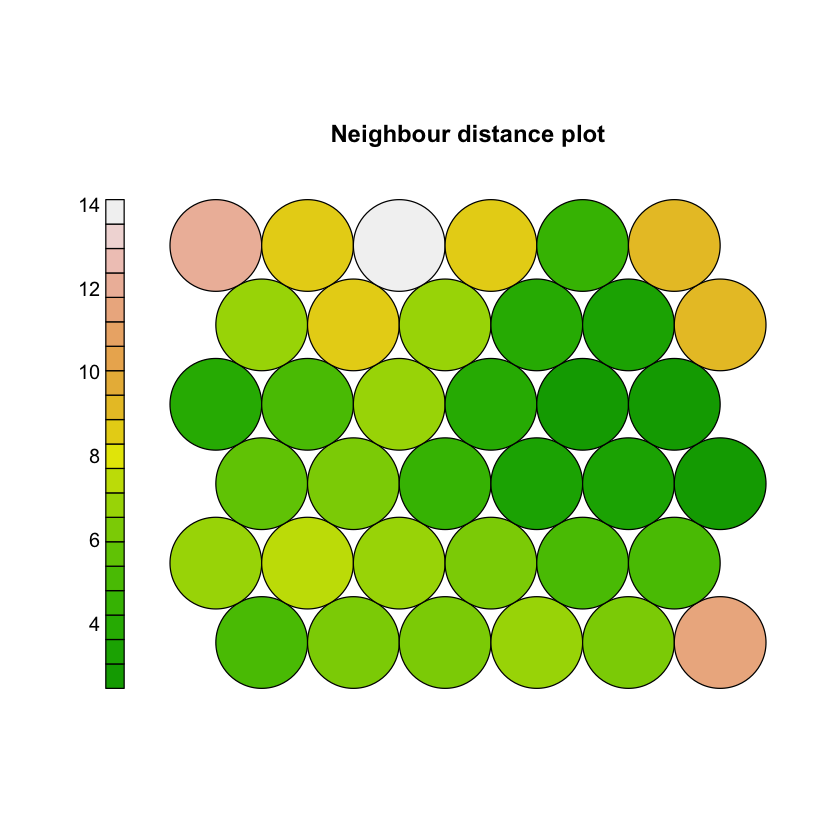

In [16]:
sommap <- som(scale(datos), grid = somgrid(6, 6, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Con 36 agrupaciones se pueden notar que casi todos los grupos tienen diferencias y cada agrupacion tiene una cantidad de elementos similar el uno del otro. Estas características pueden ser una señal de que el número de agrupaciones es efectiva.